In [1]:
import tensorflow as tf
import numpy as np
import nibabel as nib
import os
import datetime

import UNET


%load_ext autoreload
%autoreload 2

In [3]:
path = "/home/francesco/UQ/Job/deepQSM/data/shapes_shape16_ex5_2019_03_26/"

X, Y = [], []
for i in range(1, 2):
    X.append(nib.load(path + "traintrain1-size16-ex5_" + str(i) + "_forward_tfrange.nii").get_data())
    Y.append(nib.load(path + "traintrain1-size16-ex5_" + str(i) + "_ground_truth_tfrange.nii").get_data())

X = np.array(X)
Y = np.array(Y)

X = np.expand_dims(X, axis=-1)
Y = np.expand_dims(Y, axis=-1)

print(X.shape)
print(Y.shape)

print(Y.max())
print(Y.min())

(1, 16, 16, 16, 1)
(1, 16, 16, 16, 1)
6.045983e-06
-0.39283463


In [4]:
lr = 1e-4

# Create folder for checkpoint
'''datenow = str(datetime.datetime.now())
tmp = ("").join(datenow.split(":")[:2])
tmp = ("_").join(tmp.split(" "))

checkpoint_name = "../checkpoints/" + tmp
try:
    os.makedirs(checkpoint_name, exist_ok=True) 
except FileExistsError:
    print("Directory already exists")'''

'datenow = str(datetime.datetime.now())\ntmp = ("").join(datenow.split(":")[:2])\ntmp = ("_").join(tmp.split(" "))\n\ncheckpoint_name = "../checkpoints/" + tmp\ntry:\n    os.makedirs(checkpoint_name, exist_ok=True) \nexcept FileExistsError:\n    print("Directory already exists")'

In [7]:
tf.reset_default_graph()

X_tensor = tf.placeholder(tf.float32, shape=[None, X.shape[1], X.shape[2], X.shape[3], X.shape[4]], name='X')
Y_tensor = tf.placeholder(tf.float32, shape=[None, Y.shape[1], Y.shape[2], Y.shape[3], Y.shape[4]], name='Y')


#X_tens, Y_tens = train_input_fn()
output_layer = UNET.getNetwork(X_tensor)

In [8]:
loss = tf.abs(output_layer - Y_tensor)
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [9]:
min_val = 100
with tf.Session() as sess:

    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    
    for n in range(3000):
        
        #features, labels = sess.run(train_input_fn())
        #features = features["x"]
        
        _, loss_val = sess.run([optimizer, loss], feed_dict={X_tensor : X, 
                                                             Y_tensor : Y})
        tmp = np.mean(loss_val)
        
        if tmp < min_val:
            min_val = tmp
            save_path = saver.save(sess, "../checkpoints/model.ckpt")
            print(min_val)

0.57631814
0.5367216
0.5010537
0.4686398
0.43916243
0.41243735
0.38801906
0.3654077
0.34427392
0.3241024
0.30456012
0.2850356
0.26468527
0.24272314
0.21733643
0.18894827
0.1625267
0.14606965
0.13445355
0.122200206
0.11452094
0.11099585
0.10909921
0.107544996
0.10580461
0.10362302
0.100942224
0.09783802
0.094456404
0.09105727
0.087974906
0.08554742
0.08417539
0.08329333
0.0817357
0.07903167
0.07563656
0.072564974
0.07044673
0.06913409
0.06798522
0.06657718
0.06492297
0.0637613
0.06337862
0.06313662
0.06227854
0.060936287
0.05974868
0.05896057
0.058201507
0.057134047
0.055866566
0.05485169
0.054196343
0.053469356
0.052454382
0.051576
0.050951876
0.050222065
0.04930538
0.04847765
0.04785858
0.047149487
0.0463212
0.045710813
0.045099407
0.044357754
0.043710973
0.04308672
0.042330198
0.041676156
0.04103657
0.040359072
0.03977734
0.03912542
0.038490225
0.03790702
0.037274446
0.036757536
0.03616912
0.035654318
0.035123818
0.034640394
0.034138843
0.03366548
0.033173297
0.03271559
0.032255046
0

KeyboardInterrupt: 

In [10]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "../checkpoints/model.ckpt") 

    
    img_gen, loss_val = sess.run([output_layer, loss], feed_dict={X_tensor : X, 
                                                                  Y_tensor : Y})
    
    print(img_gen.shape)
    print(np.mean(loss_val))
    print(np.mean(np.abs(img_gen - Y)))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../checkpoints/model.ckpt
(1, 16, 16, 16, 1)
0.006975935
0.006975935


In [11]:
print(img_gen[0,12,:,8,0])
print(Y[0,12,:,8,0])

[-0.2693951  -0.26903522 -0.26928908 -0.259717   -0.28455028 -0.28335452
 -0.26757747 -0.2665941  -0.27401096 -0.26967514 -0.2705316  -0.27128914
 -0.2826149  -0.26738238 -0.2696941  -0.093555  ]
[-2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01
 -2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01
 -2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01 -2.723028e-01
  1.739370e-20]


(16, 16)


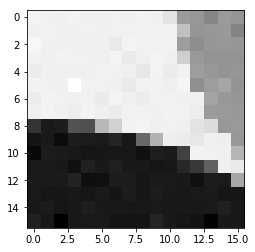

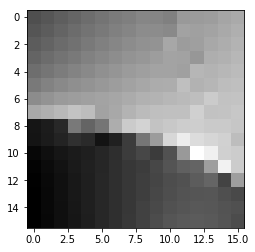

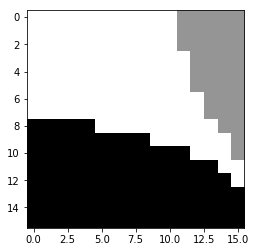

In [13]:
import matplotlib.pyplot as plt

img_ind = 0
z = 8

data = np.squeeze(img_gen[img_ind,:,:,z], axis=2)
print(data.shape)

plt.imshow(data, cmap="gray")
plt.show()

plt.imshow(np.squeeze(X[img_ind,:,:,z], axis=2), cmap="gray")
plt.show()

plt.imshow(np.squeeze(Y[img_ind,:,:,z], axis=2), cmap="gray")
plt.show()